In [6]:
import kaggle 

kaggle.api.authenticate()

kaggle.api.dataset_download_files('hiimanshuagarwal/predictive-maintenance-dataset', path = r'C:\Users\kamprm\Desktop\Project\Predictive Maintenance', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/hiimanshuagarwal/predictive-maintenance-dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_csv(r'C:\Users\kamprm\Desktop\Project\Predictive Maintenance\predictive_maintenance_dataset.csv')

In [3]:
df.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [5]:
df['date'] = pd.to_datetime(df['date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     124494 non-null  datetime64[ns]
 1   device   124494 non-null  object        
 2   failure  124494 non-null  int64         
 3   metric1  124494 non-null  int64         
 4   metric2  124494 non-null  int64         
 5   metric3  124494 non-null  int64         
 6   metric4  124494 non-null  int64         
 7   metric5  124494 non-null  int64         
 8   metric6  124494 non-null  int64         
 9   metric7  124494 non-null  int64         
 10  metric8  124494 non-null  int64         
 11  metric9  124494 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 11.4+ MB


In [7]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [8]:
df_failure = df.groupby('failure')['device'].count()
df_failure = pd.DataFrame(df_failure)
df_failure

,device
failure,
0,124388
1,106


In [9]:
df_failure['ratio'] = (df_failure['device'] / df_failure['device'].sum())*100

In [10]:
df_failure

,device,ratio
failure,,
0,124388,99.914855
1,106,0.085145


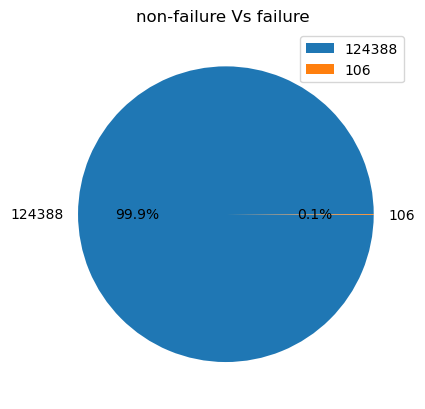

In [11]:
df_failure.plot(kind='pie', y='ratio', labels=df_failure['device'], autopct='%1.1f%%')
plt.title('non-failure Vs failure ')
plt.ylabel('')
plt.show()

In [12]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [13]:
if df['metric7'].equals(df['metric8']):
    print("metric7 and metric8 same all row")
else:
    print("metric7 and metric8 not same all row")

metric7 and metric8 same all row


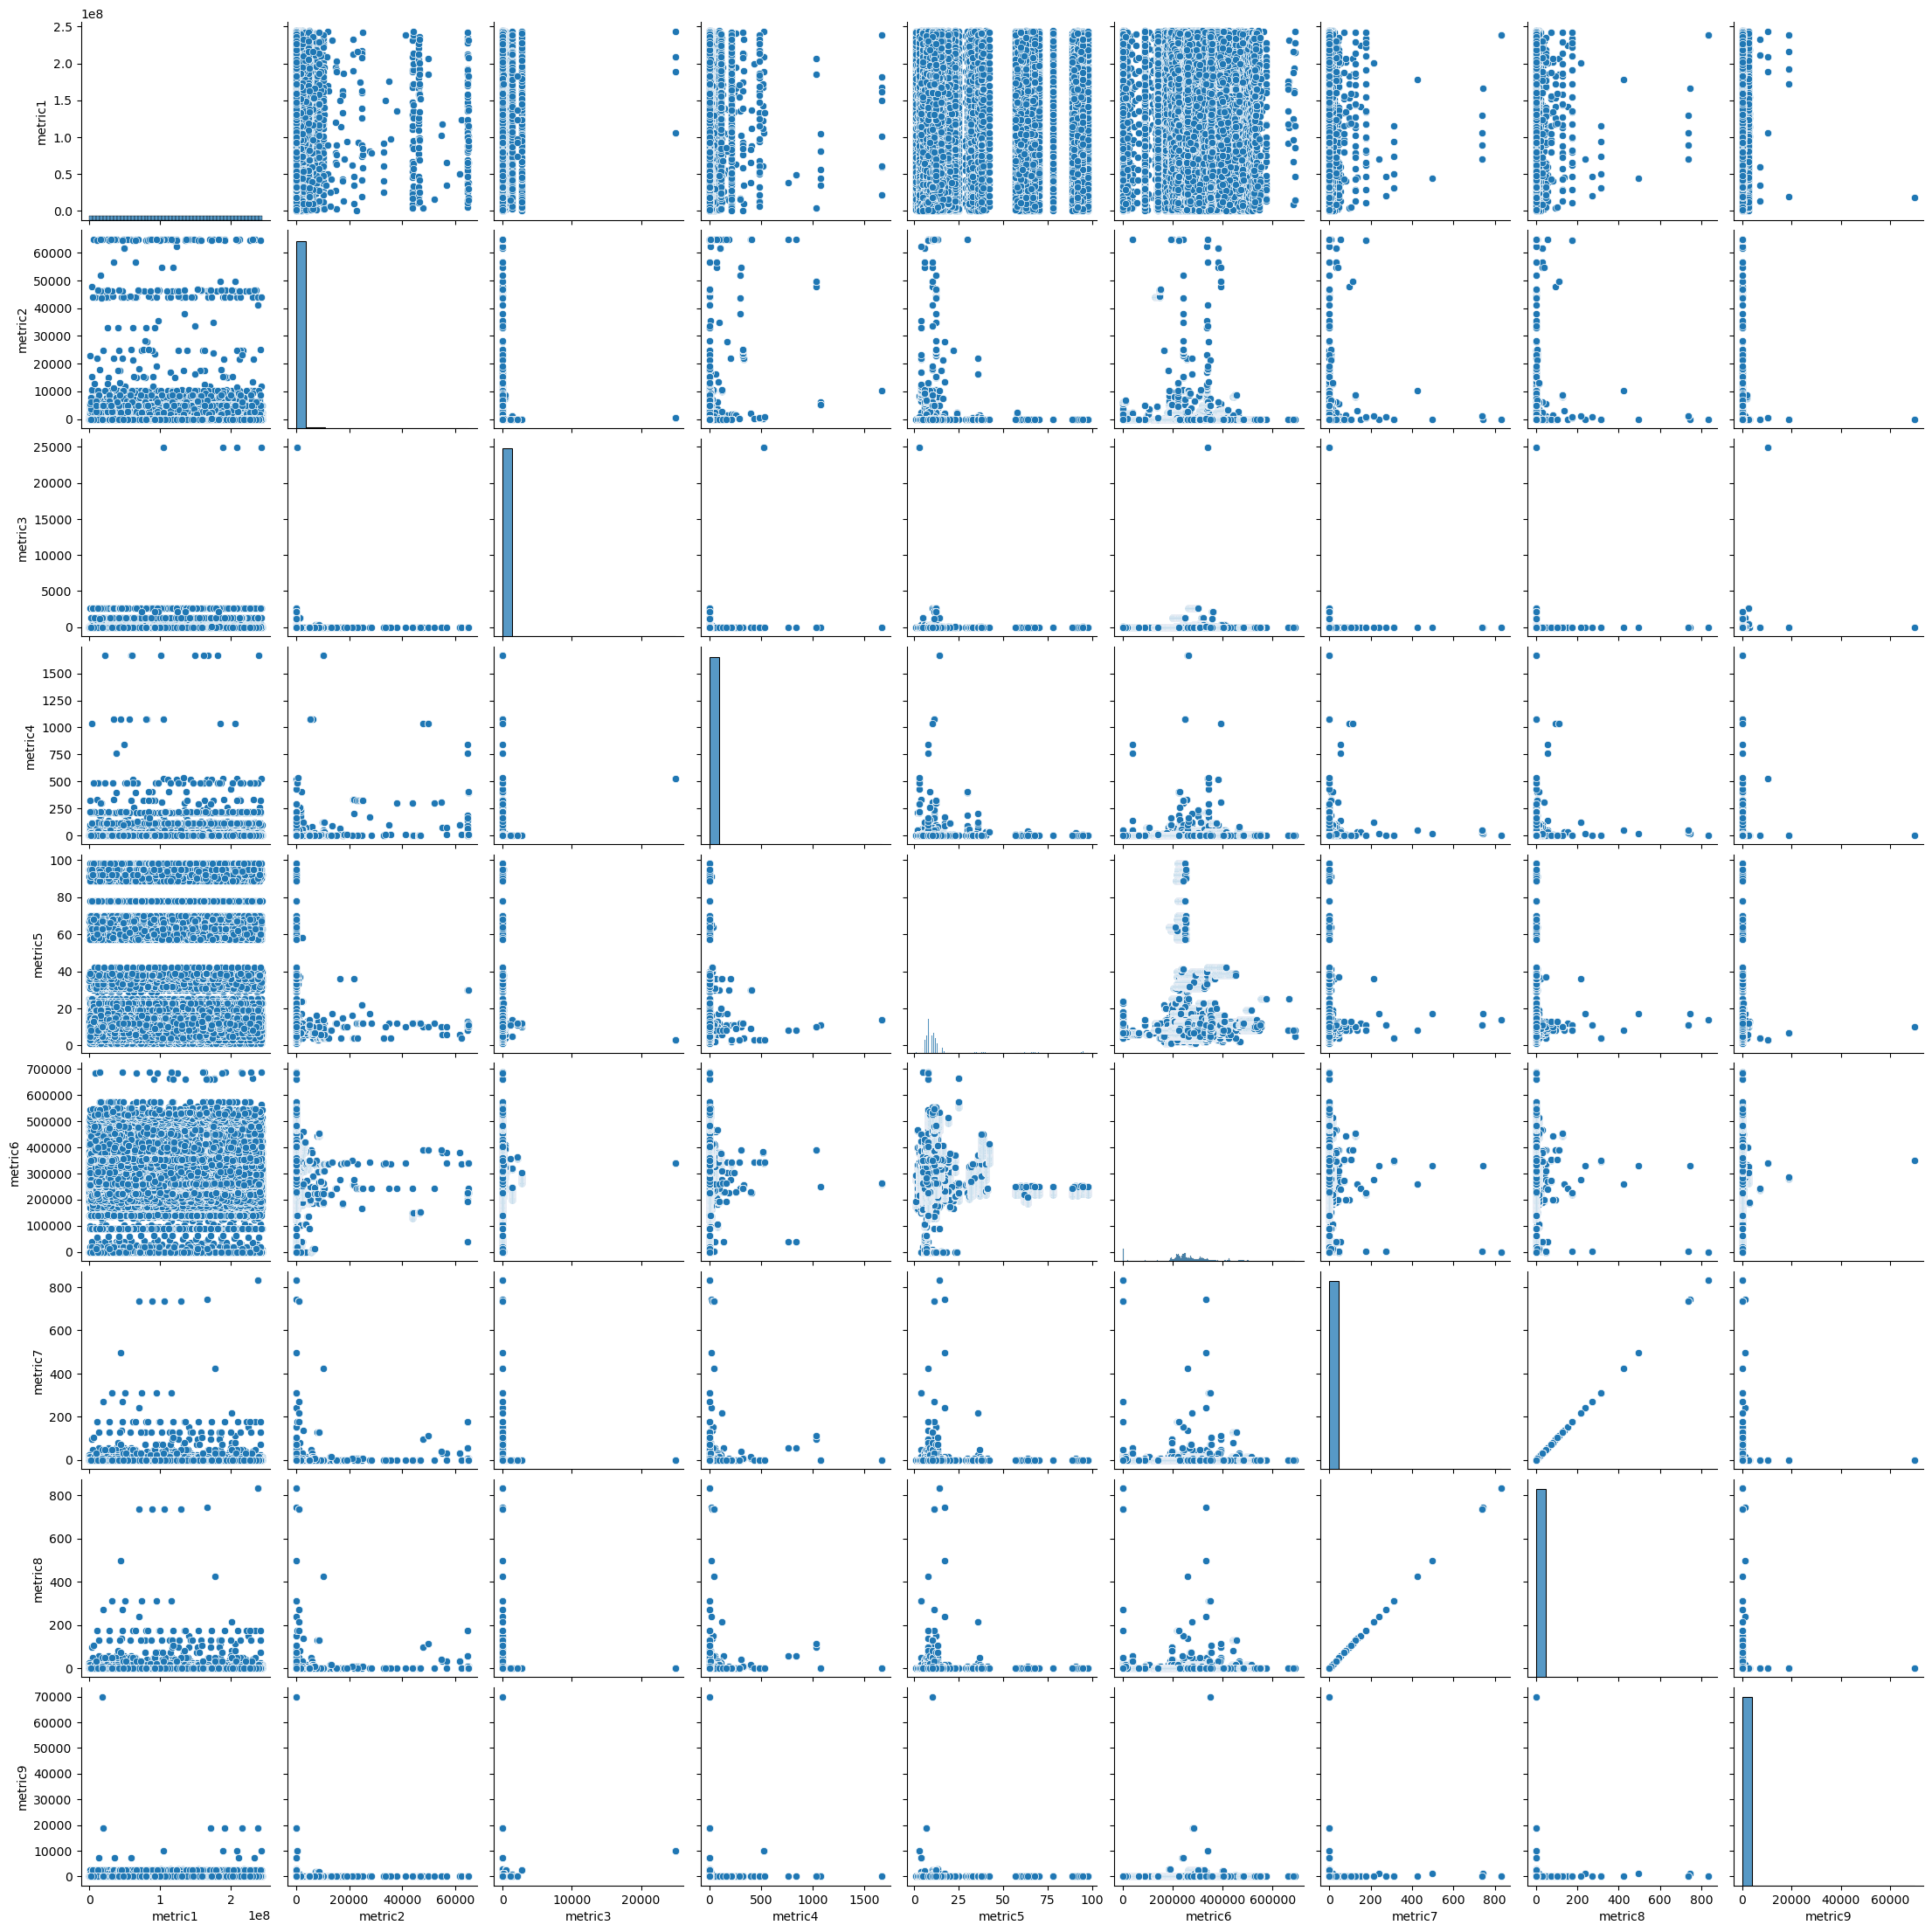

In [14]:
sns.pairplot(data = df, vars = ['metric1', 'metric2', 'metric3', 'metric4','metric5', 'metric6', 'metric7', 'metric8', 'metric9'])
plt.show()

In [15]:
df = df.drop(['metric8'], axis=1)

In [16]:
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3
...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0


In [17]:
df['activedays'] = df.date - df.date.min()
df['week_day'] = df.date.dt.weekday
df['month'] = df.date.dt.month

In [18]:
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,week_day,month
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,3,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,3,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,3,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,3,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,305 days,0,11
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,305 days,0,11
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,305 days,0,11
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,305 days,0,11


ใช้ .dt.weekday เพื่อดึง วันในสัปดาห์
ค่าที่ได้จะเป็นเลข 0-6 (ตาม Pandas format)
- 0 = จันทร์ (Monday)
- 1 = อังคาร (Tuesday)
- 2 = พุธ (Wednesday)
- 3 = พฤหัสบดี (Thursday)
- 4 = ศุกร์ (Friday)
- 5 = เสาร์ (Saturday)
- 6 = อาทิตย์ (Sunday)

แปลงวันจันทร์ (0) เป็นวันอาทิตย์ (7)

In [19]:
df['week_day'] = df['week_day'].replace(0, 7)

In [20]:
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,week_day,month
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0 days,3,1
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0 days,3,1
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0 days,3,1
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0 days,3,1
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0 days,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,305 days,7,11
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,305 days,7,11
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,305 days,7,11
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,305 days,7,11


In [21]:
df_active = df.groupby('month')['device'].nunique().to_frame(name='device')
df_active

,device
month,
1,1164
2,726
3,685
4,491
5,424
6,353
7,346
8,334
9,184


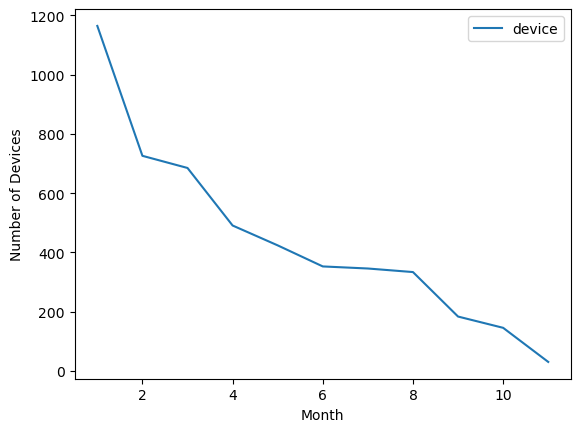

In [22]:
df_active.plot()
plt.xlabel('Month')  # ชื่อแกน X
plt.ylabel('Number of Devices')  # ชื่อแกน Y
plt.show()

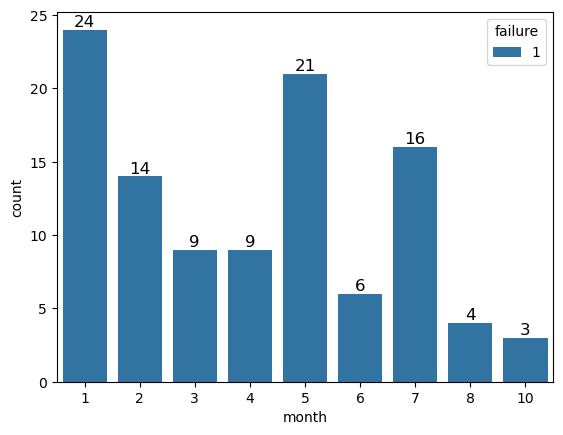

In [23]:
ax = sns.countplot(x="month", hue="failure", data=df[df['failure'] == 1])

# ใส่ตัวเลขบนแท่งกราฟ
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=12, color="black")

plt.show()


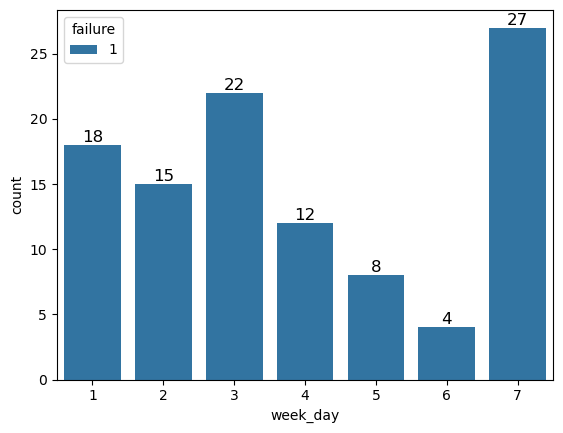

In [24]:
ax = sns.countplot(x="week_day", hue="failure", data=df[df['failure']==1])
for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=12, color="black")

plt.show()

In [25]:
df_summary = pd.DataFrame(columns=['device', 'Con', 'Op'])
df_summary['device'] = df['device'].unique()

# Loop through each device
for device in df['device'].unique():
    filtered_df = df[df['device'] == device].reset_index(drop=True)

    con = 0  # reconnect count
    Op = 0   # operating time count

    # Loop through the filtered device data
    for x in range(1, len(filtered_df)):  # Starting from 1 to avoid index out of range
        # Check for reconnect event (change in 'failure' state)
        if filtered_df['failure'].iloc[x] != filtered_df['failure'].iloc[x-1]:
            con += 1
        
        # Count operating time (failure == 0)
        if filtered_df['failure'].iloc[x-1] == 0:
            Op += 1

    # Store the counts in the summary DataFrame
    df_summary.loc[df_summary['device'] == device, 'Con'] = con
    df_summary.loc[df_summary['device'] == device, 'Op'] = Op  # Include the first operating time



In [26]:
df_summary

,device,Con,Op
0,S1F01085,0,5
1,S1F0166B,0,5
2,S1F01E6Y,0,47
3,S1F01JE0,0,5
4,S1F01R2B,0,222
...,...,...,...
1164,S1F013BB,0,5
1165,S1F02W1L,0,5
1166,S1F02XLX,0,5
1167,S1F03499,0,5


In [27]:
df['op_period'] = 0
df['dev_reconnected'] = 0
device_list = df['device'].unique()
for x in device_list:
    idx = df['device'] == x
    aux = np.sum(idx)
    aux2 = range(1,aux+1)
    df.loc[idx,'op_period'] = aux2
    
    idx2 = df[idx].index
    for i in range(0,len(idx2)-1):
        aux = (df.loc[idx2[i],'date'])+dt.timedelta(days=1)
        aux2 =(df.loc[idx2[i+1],'date'])
        if aux != aux2:
            df.loc[idx2[i+1],'dev_reconnected'] = df.loc[idx2[i],'dev_reconnected']+1
        else:
            df.loc[idx2[i+1],'dev_reconnected'] = df.loc[idx2[i],'dev_reconnected']

In [28]:
df['activedays'] = df['activedays'].astype(str).str.replace(' days', '', regex=False).astype(int)
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,week_day,month,op_period,dev_reconnected
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0,3,1,1,0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,3,1,1,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,3,1,1,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,3,1,1,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,305,7,11,304,2
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,305,7,11,304,2
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,305,7,11,304,2
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,305,7,11,304,2


In [29]:
df['is_weekend'] = df['week_day'].apply(lambda x: 1 if x >= 5 else 0)
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,week_day,month,op_period,dev_reconnected,is_weekend
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,7,0,3,1,1,0,0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,3,1,1,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,3,1,1,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,3,1,1,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,3,0,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0,305,7,11,304,2,1
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13,305,7,11,304,2,1
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,305,7,11,304,2,1
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,305,7,11,304,2,1


In [30]:
df_model = df.copy()



In [31]:
df_model['device_model'] = df_model['device'].str[:4]  # แยกเฉพาะรหัสอุปกรณ์ เช่น "Z1F0"

encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' เพื่อลด multicollinearity
encoded_features = pd.DataFrame(encoder.fit_transform(df_model[['device_model']]), columns=encoder.get_feature_names_out())


df_model = pd.concat([df_model, encoded_features], axis=1)
df_model.drop(columns=['device', 'device_model'], inplace=True)


In [32]:
df_model = df_model.rename(columns={
     'device_model_S1F1': 'S1F1', 'device_model_W1F0': 'W1F0',
     'device_model_W1F1': 'W1F1', 'device_model_Z1F0': 'Z1F0', 
     'device_model_Z1F1': 'Z1F1', 'device_model_Z1F2': 'Z1F2'
}, errors='ignore')
df_model

,date,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,...,month,op_period,dev_reconnected,is_weekend,S1F1,W1F0,W1F1,Z1F0,Z1F1,Z1F2
0,2015-01-01,0,215630672,55,0,52,6,407438,0,7,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,0,61370680,0,3,0,6,403174,0,0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-01,0,173295968,0,0,0,12,237394,0,0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-01,0,79694024,0,0,0,6,410186,0,0,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-01,0,135970480,0,0,0,15,313173,0,3,...,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,0,18310224,0,0,0,10,353705,8,0,...,11,304,2,1,0.0,0.0,0.0,1.0,0.0,0.0
124490,2015-11-02,0,172556680,96,107,4,11,332792,0,13,...,11,304,2,1,0.0,0.0,0.0,1.0,0.0,0.0
124491,2015-11-02,0,19029120,4832,0,0,11,350410,0,0,...,11,304,2,1,0.0,0.0,0.0,1.0,0.0,0.0
124492,2015-11-02,0,226953408,0,0,0,12,358980,0,0,...,11,304,2,1,0.0,0.0,0.0,1.0,0.0,0.0


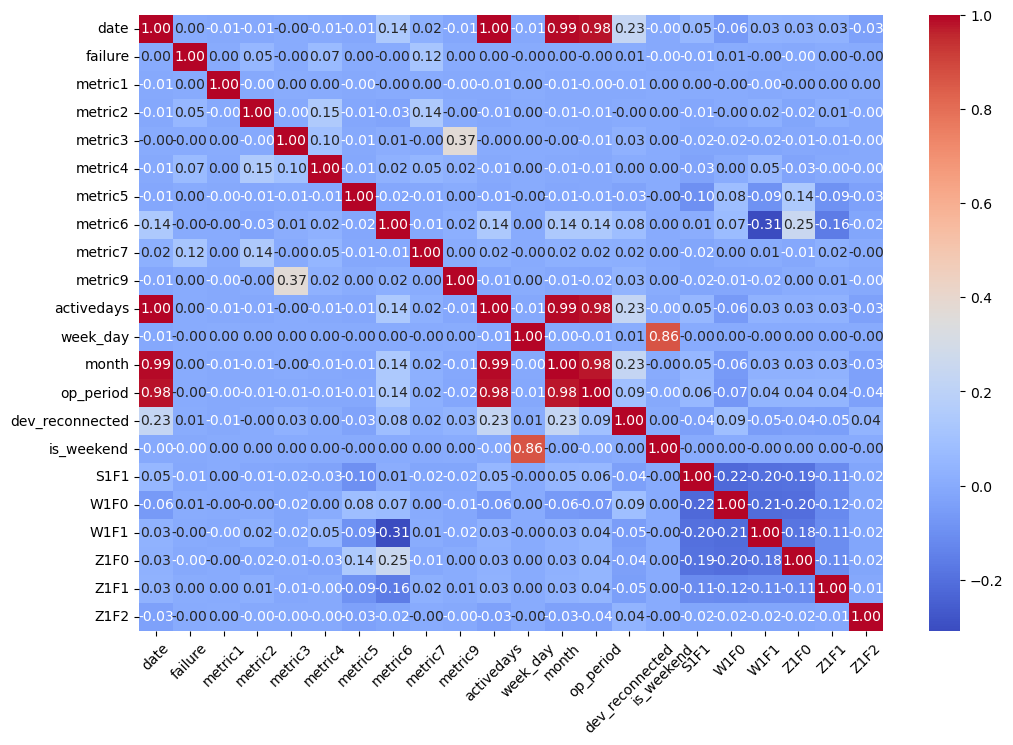

In [33]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45)  # หมุน label แกน X 45 องศา
plt.yticks(rotation=0)   # แกน Y ให้ตรง
plt.show()


- date	ซ้ำซ้อนกับ activedays
- month	ซ้ำซ้อนกับ op_period
- is_weekend	ซ้ำซ้อนกับ week_day
- activedays ซ้ำซ้อนกับ op_period

In [34]:
df_model.drop(columns=['date','month','is_weekend','op_period'], inplace=True)
df_model

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,week_day,dev_reconnected,S1F1,W1F0,W1F1,Z1F0,Z1F1,Z1F2
0,0,215630672,55,0,52,6,407438,0,7,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,61370680,0,3,0,6,403174,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,173295968,0,0,0,12,237394,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,79694024,0,0,0,6,410186,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,135970480,0,0,0,15,313173,0,3,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0,18310224,0,0,0,10,353705,8,0,305,7,2,0.0,0.0,0.0,1.0,0.0,0.0
124490,0,172556680,96,107,4,11,332792,0,13,305,7,2,0.0,0.0,0.0,1.0,0.0,0.0
124491,0,19029120,4832,0,0,11,350410,0,0,305,7,2,0.0,0.0,0.0,1.0,0.0,0.0
124492,0,226953408,0,0,0,12,358980,0,0,305,7,2,0.0,0.0,0.0,1.0,0.0,0.0


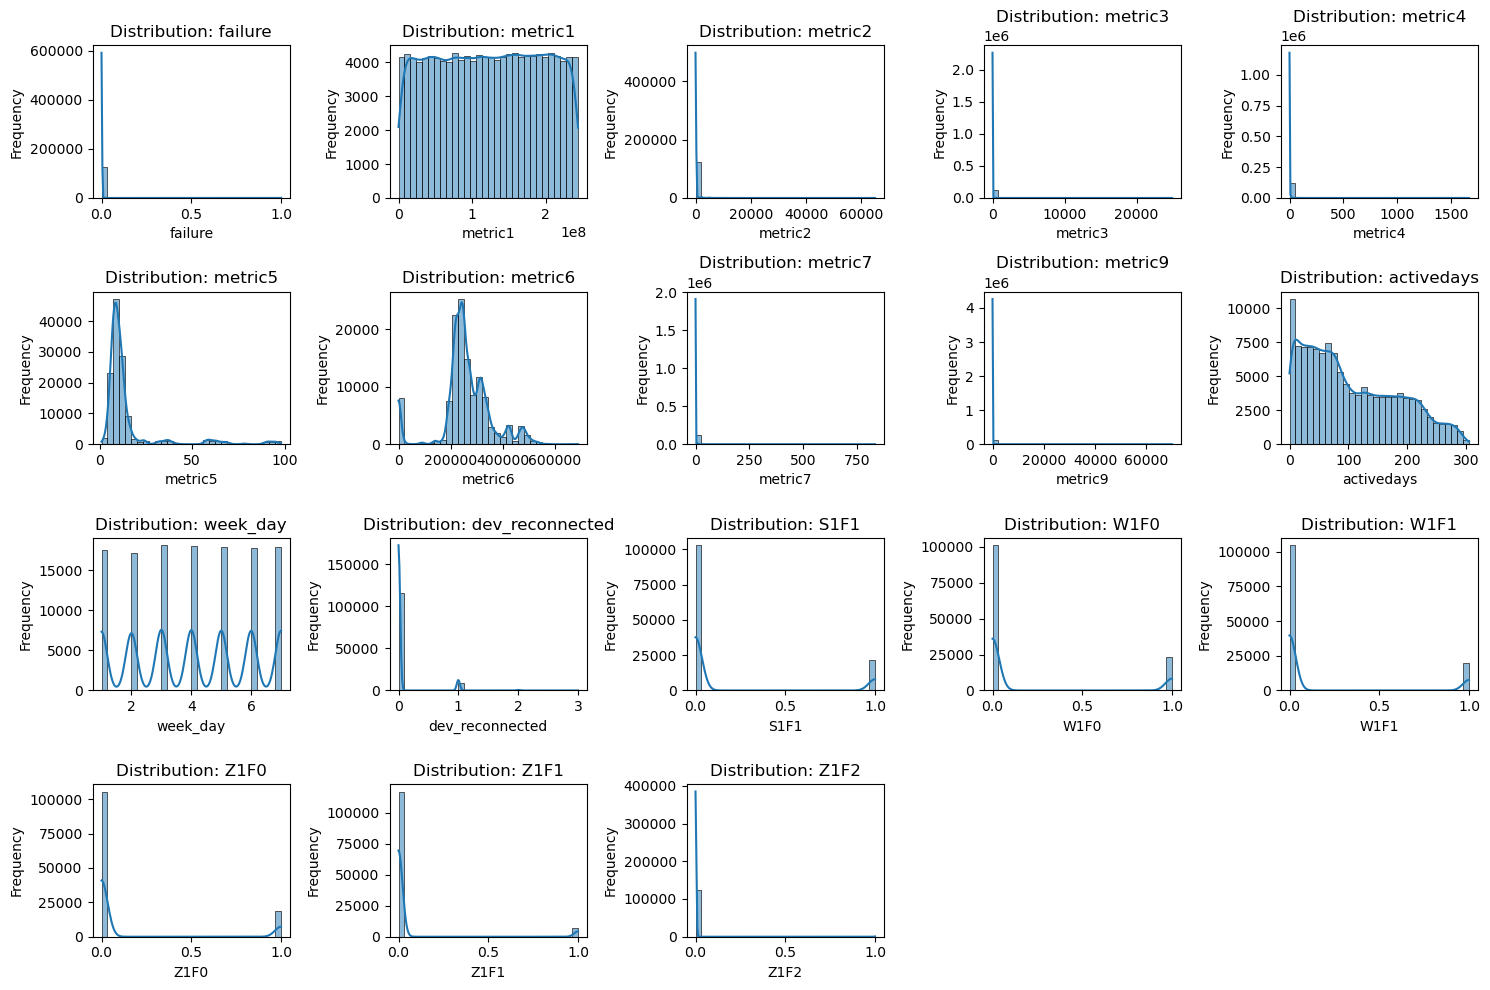

In [35]:
# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(15, 10))

# วนลูปสร้าง histogram และ KDE plot
for i, col in enumerate(df_model.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df_model[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution: {col}')
        
plt.tight_layout()
plt.show()


In [36]:
scaler_SS = StandardScaler()
numeric_cols = ['metric3', 'metric4', 'metric7', 'metric9', 'activedays']
df_model[numeric_cols] = scaler_SS.fit_transform(df_model[numeric_cols])


In [37]:
scaler_mm = MinMaxScaler()
numeric_cols = ['failure', 'dev_reconnected', 'metric7', 'metric9', 'S1F1', 'W1F0', 'W1F1', 'Z1F0', 'Z1F1', 'Z1F2']
df_model[numeric_cols] = scaler_mm.fit_transform(df_model[numeric_cols])

In [38]:
scaler_RS = RobustScaler()
numeric_cols = ['metric1', 'metric2', 'metric5', 'metric6']
df_model[numeric_cols] = scaler_RS.fit_transform(df_model[numeric_cols])

In [39]:
df_model

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,activedays,week_day,dev_reconnected,S1F1,W1F0,W1F1,Z1F0,Z1F1,Z1F2
0,0.0,0.760773,55.0,-0.053518,2.193905,-1.00,1.774929,0.000000,0.000100,-1.341926,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,-0.503395,0.0,-0.037367,-0.076004,-1.00,1.726918,0.000000,0.000000,-1.341926,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.413838,0.0,-0.053518,-0.076004,0.50,-0.139680,0.000000,0.000000,-1.341926,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.353234,0.0,-0.053518,-0.076004,-1.00,1.805870,0.000000,0.000000,-1.341926,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.107954,0.0,-0.053518,-0.076004,1.25,0.713553,0.000000,0.000043,-1.341926,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,0.0,-0.856278,0.0,-0.053518,-0.076004,0.00,1.169923,0.009615,0.000000,2.547797,7,0.666667,0.0,0.0,0.0,1.0,0.0,0.0
124490,0.0,0.407780,96.0,0.522533,0.098605,0.25,0.934453,0.000000,0.000186,2.547797,7,0.666667,0.0,0.0,0.0,1.0,0.0,0.0
124491,0.0,-0.850386,4832.0,-0.053518,-0.076004,0.25,1.132823,0.000000,0.000000,2.547797,7,0.666667,0.0,0.0,0.0,1.0,0.0,0.0
124492,0.0,0.853564,0.0,-0.053518,-0.076004,0.50,1.229316,0.000000,0.000000,2.547797,7,0.666667,0.0,0.0,0.0,1.0,0.0,0.0


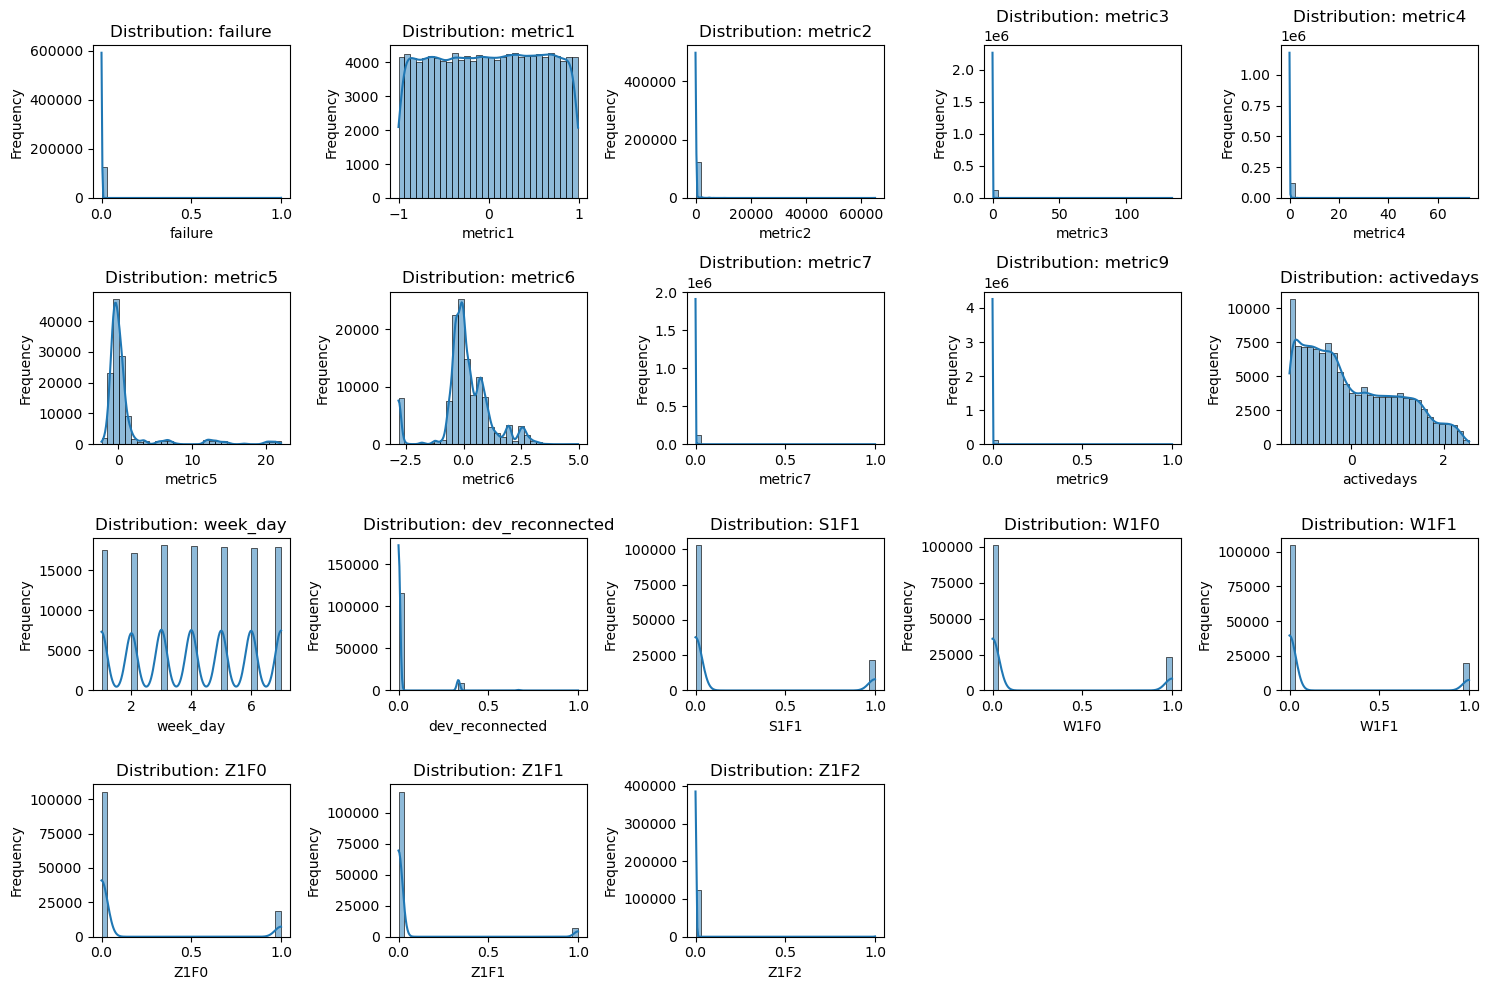

In [40]:
# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(15, 10))

# วนลูปสร้าง histogram และ KDE plot
for i, col in enumerate(df_model.columns):
    plt.subplot(4, 5, i + 1)
    sns.histplot(df_model[col], kde=True, bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution: {col}')
        
plt.tight_layout()
plt.show()

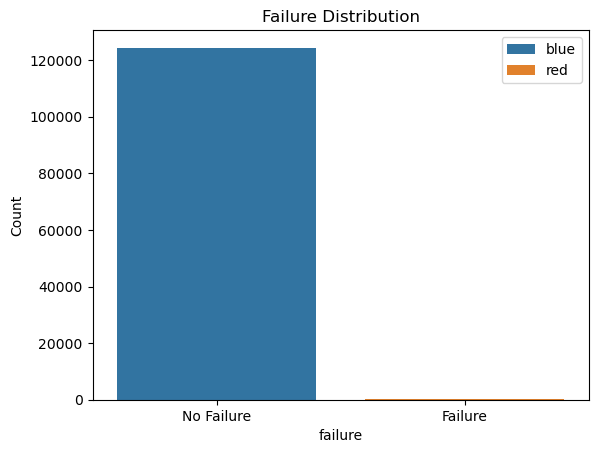

อัตราส่วน No Failure : Failure = 124388 : 106 (1173.47:1)


In [41]:
# นับจำนวน class ของ failure
failure_counts = df_model['failure'].value_counts()

# วาดกราฟ
sns.barplot(x=failure_counts.index, y=failure_counts.values, hue=['blue', 'red'])
plt.xticks([0, 1], ['No Failure', 'Failure'])
plt.ylabel('Count')
plt.title('Failure Distribution')
plt.show()

# คำนวณอัตราส่วน
ratio = failure_counts[0] / failure_counts[1]
print(f"อัตราส่วน No Failure : Failure = {failure_counts[0]} : {failure_counts[1]} ({ratio:.2f}:1)")


In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# แยก Features และ Target
X = df_model.drop(columns=['failure'])
y = df_model['failure']

# ใช้ SMOTE เพื่อเพิ่มตัวอย่างของ class ที่มีจำนวนน้อย
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ตรวจสอบอัตราส่วนใหม่
print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))


Before SMOTE: Counter({0.0: 124388, 1.0: 106})
After SMOTE: Counter({0.0: 124388, 1.0: 124388})


In [43]:
from sklearn.model_selection import train_test_split

# แบ่งชุดข้อมูล (X คือ Features, y คือ Target)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.2, shuffle=True, 
                                                    random_state=42)


print(f"Train Set: {X_train.shape} Test Set: {X_test.shape}")


Train Set: (199020, 17) Test Set: (49756, 17)


In [ ]:
from sklearn.model_selection import StratifiedKFold
# ตั้งค่า Cross-validation (Stratified K-Fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# ตั้งค่าพารามิเตอร์ที่ต้องการค้นหา
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],  # ค่าของ regularization strength
    'solver': ['liblinear', 'lbfgs']  # วิธีแก้สมการ
}


# ใช้ GridSearchCV
grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
                                  param_grid_logreg, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters for Logistic Regression:", grid_search_logreg.best_params_)
print("Best Accuracy:", grid_search_logreg.best_score_)


Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best Accuracy: 0.7702793689076475


c:\Users\kamprm\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.tree import DecisionTreeClassifier

# ตั้งค่าพารามิเตอร์
param_grid_tree = {
    'max_depth': [3, 5, 10, None],  # ความลึกของต้นไม้
    'min_samples_split': [2, 5, 10],  # จำนวนขั้นต่ำของตัวอย่างในการ split
    'criterion': ['gini', 'entropy']  # วิธีเลือก split
}

# ใช้ GridSearchCV
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                param_grid_tree, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters for Decision Tree:", grid_search_tree.best_params_)
print("Best Accuracy:", grid_search_tree.best_score_)

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5}
Best Accuracy: 0.998974977389207


In [46]:
from sklearn.ensemble import RandomForestClassifier

# ตั้งค่าพารามิเตอร์
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # จำนวนต้นไม้
    'max_depth': [None, 10, 20],  # ความลึกของต้นไม้
    'min_samples_split': [2, 5, 10],  # จำนวนขั้นต่ำของตัวอย่างในการ split
    'criterion': ['gini', 'entropy']
}

# ใช้ GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9994774394533212


In [47]:
from sklearn.metrics import classification_report

# ใช้โมเดลที่ดีที่สุดจาก Grid Search
best_logreg = grid_search_logreg.best_estimator_
best_tree = grid_search_tree.best_estimator_
best_rf = grid_search_rf.best_estimator_

# ทำนายผล
y_pred_logreg = best_logreg.predict(X_test)
y_pred_tree = best_tree.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# แสดงผลลัพธ์
print("Logistic Regression:\n", classification_report(y_test, y_pred_logreg))
print("Decision Tree:\n", classification_report(y_test, y_pred_tree))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

         0.0       0.71      0.87      0.78     24752
         1.0       0.84      0.66      0.73     25004

    accuracy                           0.76     49756
   macro avg       0.78      0.76      0.76     49756
weighted avg       0.78      0.76      0.76     49756

Decision Tree:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24752
         1.0       1.00      1.00      1.00     25004

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756

Random Forest:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     24752
         1.0       1.00      1.00      1.00     25004

    accuracy                           1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1

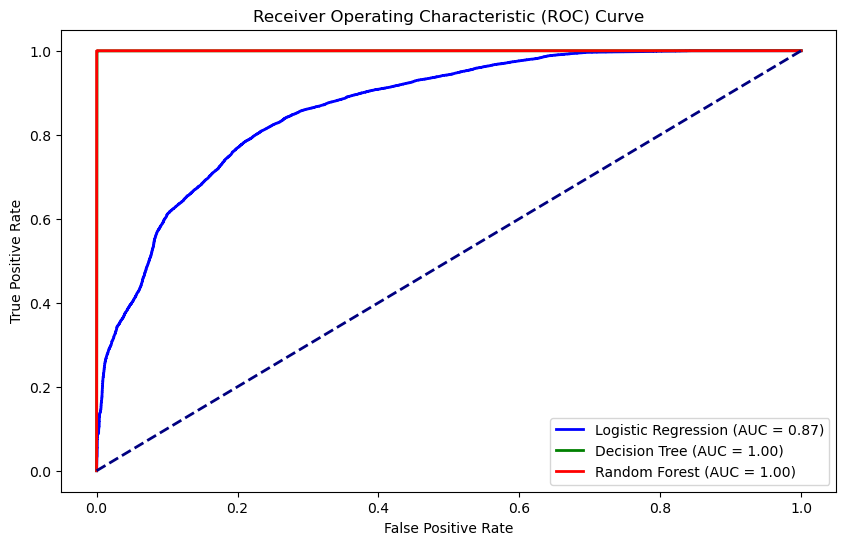

In [48]:
from sklearn.metrics import roc_curve, auc
# คำนวณค่าความน่าจะเป็น
y_prob_logreg = best_logreg.predict_proba(X_test)[:, 1]
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# คำนวณ ROC curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

# คำนวณ AUC (Area Under the Curve)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_tree = auc(fpr_tree, tpr_tree)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# แสดงผลลัพธ์ของ ROC Curve
plt.figure(figsize=(10, 6))

plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# ค่าพื้นฐาน ROC curve (diagonal line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

plt.show()